# Classification Using Decision Tree

### Step 1: Importing All Relevant Libraries

In [9]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Step 2: Load and Explore the Dataset
- The Iris dataset contains 150 records of flower measurements and their species

In [10]:
# Loading the Iris dataset
from sklearn.datasets import load_iris
dataset = load_iris()

# Creating a DataFrame
dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe['target'] = dataset.target

# Preview the dataset
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step 3: Visualize Class Distribution

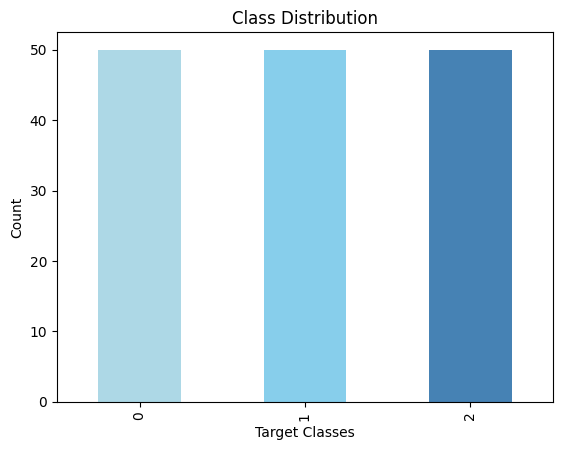

In [11]:
# Checking the class distribution
dataframe['target'].value_counts().plot(kind='bar', color=['lightblue', 'skyblue', 'steelblue'])
plt.title('Class Distribution')
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.show()

### Step 4: Preprocess the Data
- Splitting guarantees that we evaluate the model on unseen data

In [12]:
# Define features (X) and target (y)
X = dataframe.iloc[:, :-1]  # Features
y = dataframe['target']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 120
Testing set size: 30


### Step 5: Train a Decision Tree Classifier
- Gini Index: It is commonly used in decision Tree that measures the impurity of a "node" in dataset
- The Gini index is a way to measure how likely it is to incorrectly classify a randomly chosen item from a dataset. It acts as a cost function that  helps assess how well the splits in the dataset are working.

In [13]:
# Create and train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

### Step 6: Evaluate the Model
- Evaluating how well the model is doing by looking at its accuracy and using a confusion matrix

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0


### Step 7: Visualize the Decision Tree

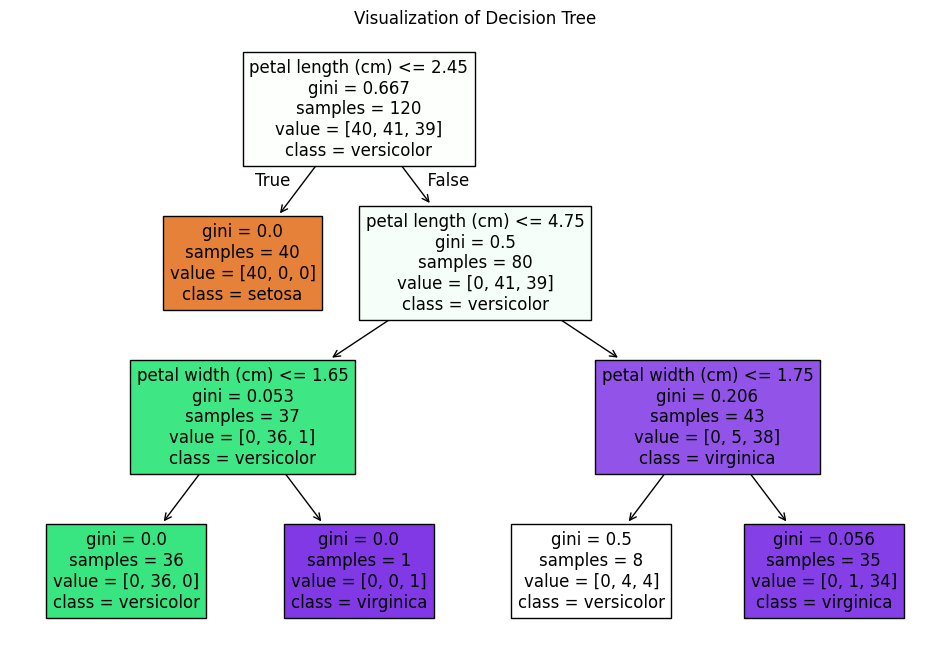

In [15]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=dataset.feature_names, class_names=dataset.target_names, filled=True)
plt.title('Visualization of Decision Tree')
plt.show()

## Step 8: Explore Feature Importance
- To identify which features have the greatest impact on the model performance

sepal length (cm): 0.00
sepal width (cm): 0.00
petal length (cm): 0.93
petal width (cm): 0.07


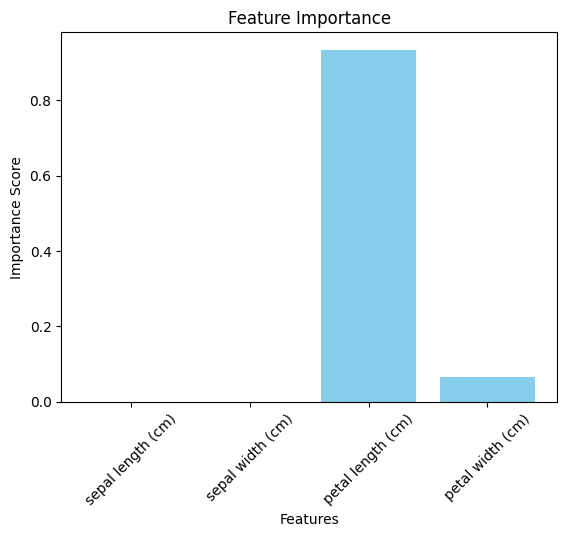

In [16]:
# Show feature importance
feature_importances = tree_model.feature_importances_
for feature, importance in zip(dataset.feature_names, feature_importances):
    print(f"{feature}: {importance:.2f}")
    
# Plot feature importances
plt.bar(dataset.feature_names, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()

# Key Insights:
1. We have trained Decision Tree using the Gini impurity criterion with a maximum depth of 3.
2. The confusion matrix and classification report including precision, f1 score and accuracy indicate how well the model performs.
3. Decision tree visualization provides an interpretable way to analyze how the tree splits data.
4. Feature importance represents which features contribute the most to the model's decision-making process.
